In [17]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import pandas as pd

file_path = '/Users/ryabcev/Downloads/spotify-2023.csv'

try:
    df = pd.read_csv(file_path, encoding='latin1')
    print("File loaded successfully with latin1 encoding")
except UnicodeDecodeError:
    print("Failed to decode with latin1. Trying cp1252...")

    try:
        df = pd.read_csv(file_path, encoding='cp1252')
        print("File loaded successfully with cp1252 encoding")
    except UnicodeDecodeError:
        print("Failed to decode with cp1252. Trying cp1251...")

        try:
            df = pd.read_csv(file_path, encoding='cp1251')
            print("File loaded successfully with cp1251 encoding")
        except UnicodeDecodeError:
            print("Failed to decode with cp1251. Please check the file for unusual characters.")

File loaded successfully with latin1 encoding


In [19]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


Описание переменных в нашем датафрейме:

track_name - Название трека.

artist(s)_name - Имя или имена артистов, исполнивших трек.

artist_count - Количество артистов, участвующих в треке.

released_year - Год выпуска трека.

released_month - Месяц выпуска трека.

released_day - День выпуска трека.

in_spotify_playlists - Количество плейлистов Spotify, в которые включен трек.

in_spotify_charts - Количество чартов Spotify, в которые включен трек.

streams - Количество прослушиваний (стримов) трека.

in_apple_playlists - Количество плейлистов Apple Music, в которые включен трек.

bpm - Темп трека в ударах в минуту.

key - Тональность трека.

mode - Мажор или минор трека (Major/Minor).

danceability_% - Уровень танцевальности трека в процентах.

valence_% - Уровень положительных эмоций (веселости) трека в процентах.

energy_% - Уровень энергичности трека в процентах.

acousticness_% - Уровень акустичности трека в процентах.

instrumentalness_% - Уровень инструментальности трека в процентах.

liveness_% - Уровень живости трека в процентах.

speechiness_% - Уровень речевого содержания в треке в процентах.

## 1 задание 

### Предварительныя обработка (максимум 10 баллов)

Проанализируйте столбцы. Что в них содержится? Опишите переменные. Есть ли в данных пропуски? Обработайте пропуски. Если в какой-то колонке пропусков большинство, то ее можно удалить. Если их не очень много, можно заполнить их медианой/средним или чем-нибудь еще, напишите почему вы выбрали тот или иной вариант.

In [20]:
print("Пропущенные значения в каждом столбце:")
print(df.isnull().sum())

# Проверка типов данных
print("Типы данных в каждом столбце:")
print(df.dtypes)


Пропущенные значения в каждом столбце:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
Типы данных в каждом столбце:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams               

In [21]:
def check_int(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

# Создаем столбец для проверки
df['is_int_streams'] = df['streams'].apply(lambda x: check_int(x))

# Выводим строки, где streams не являются целым числом
error_rows = df[~df['is_int_streams']]
print("Строки с ошибками в 'streams':")
print(error_rows)

# Решение по обработке (например, удаление ошибочных строк)
df_clean = df[df['is_int_streams']]

# Удаляем вспомогательный столбец
df_clean.drop(columns='is_int_streams', inplace=True)

# Преобразование 'streams' в числовой тип
df_clean['streams'] = df_clean['streams'].astype(int)


Строки с ошибками в 'streams':
                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts                                            streams  \
574                  0  BPM110KeyAModeMajorDanceability53Valence75Ener...   

     in_apple_playlists  ...  key   mode  danceability_% valence_%  energy_%  \
574                  16  ...    A  Major              53        75        69   

    acousticness_% instrumentalness_%  liveness_%  speechiness_%  \
574              7                  0          17              3   

     is_int_streams  
574           False  

[1 rows x 25 columns]


/var/folders/j2/5tq6080132nd8cn1pbzm2nxr0000gn/T/ipykernel_23388/4274638267.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns='is_int_streams', inplace=True)
/var/folders/j2/5tq6080132nd8cn1pbzm2nxr0000gn/T/ipykernel_23388/4274638267.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['streams'] = df_clean['streams'].astype(int)


In [22]:
# Удаление строки с ошибкой
df = df.drop(index=574)

# После удаления строки, конвертируем 'streams' в int
df['streams'] = df['streams'].astype(int)


In [23]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,is_int_streams
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,True
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,True
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,True
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,True
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,True
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,True
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,True
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,True


1) Пропуски в in_shazam_charts (50 пропущенных значений):
Поскольку данные относятся к количеству чартов в Shazam, логично предположить, что пропуски означают отсутствие трека в чартах. Заполним эти пропуски нулями.

2) Пропуски в key (95 пропущенных значений):
Тональность трека является важной музыкальной характеристикой и её пропуск может быть критичным для анализа музыкальных свойств треков. В таком случае, можно либо удалить строки с пропущенными значениями (если они не составляют значительной части датасета), либо заполнить их модой.

In [24]:
df['in_shazam_charts'].fillna(0, inplace=True)  # Замена пропусков на 0
df['key'].fillna(df['key'].mode()[0], inplace=True)  # Замена пропусков модой

# Проверка результатов
print("Пропущенные значения после обработки:")
print(df.isnull().sum())

# Проверка типов данных
print("Типы данных в каждом столбце после обработки:")
print(df.dtypes)

Пропущенные значения после обработки:
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
is_int_streams          0
dtype: int64
Типы данных в каждом столбце после обработки:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
strea

## 2 задание
### Визуализация (максимум 20 баллов)

Сделайте для своих данных разведочный анализ данных, Exploratory Data Analysis (EDA). Выясните, какие в данных есть особенности, визуализируйте их. Ваша задача — откопать в данных интересные закономерности и построить для них красивые, понятные визуализации, на основе которых можно выдвинуть гипотезы и создать для датасета новые переменные.

Оценка за этот пункт зависит от сложности графиков и интересных идей, которые можно из них заметить.

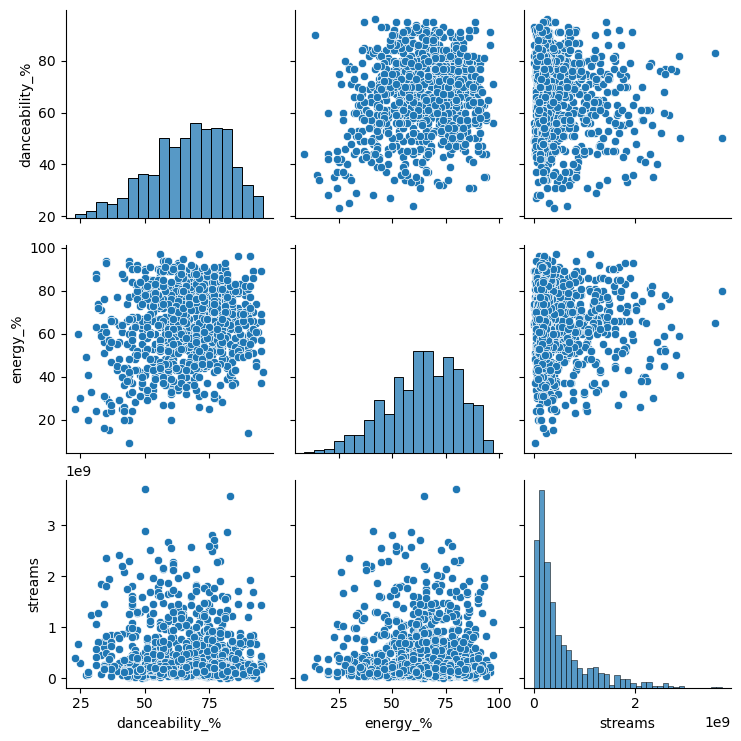

In [36]:
#1 Связь между танцевальностью, энергичностью и популярностью трека
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    sns.pairplot(df[['danceability_%', 'energy_%', 'streams']], kind='scatter')
    plt.show()

Это наборы парных графиков, генерируемых функцией pairplot библиотеки Seaborn. Этот тип графика полезен для визуализации отношений между несколькими парами переменных и распределения каждой переменной. Вот описание каждого из графиков на изображении:

Гистограммы на диагонали:

Верхний левый: Гистограмма переменной danceability_%, показывающая распределение уровня танцевальности треков.

Центральный: Гистограмма переменной energy_%, отображающая распределение уровня энергичности треков.

Нижний правый: Гистограмма переменной streams, показывающая распределение количества стримов треков. Ось X имеет логарифмический масштаб, поскольку распределение стримов варьируется от небольших значений до очень больших.

Точечные диаграммы между разными переменными:

Верхний центр и нижний левый: Точечные диаграммы между danceability_% и streams, показывающие взаимосвязь между танцевальностью трека и его популярностью в стримах.

Центральный правый и центральный левый: Точечные диаграммы между energy_% и streams, отображающие взаимосвязь между энергичностью трека и его популярностью в стримах.

Нижний центр: Точечная диаграмма между danceability_% и energy_%, показывающая взаимосвязь между танцевальностью и энергичностью треков.

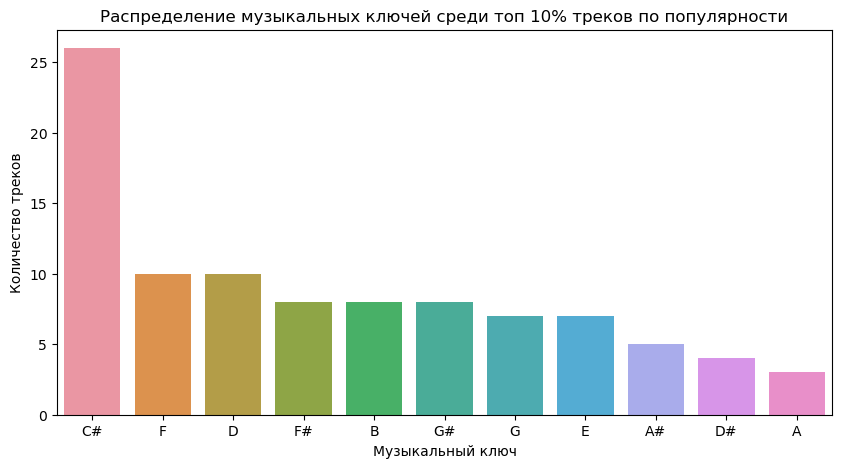

In [34]:
# 2. Распределение ключевых музыкальных характеристик среди наиболее популярных треков
top_tracks = df[df['streams'] > df['streams'].quantile(0.90)]
plt.figure(figsize=(10, 5))
sns.countplot(data=top_tracks, x='key', order=top_tracks['key'].value_counts().index)
plt.title('Распределение музыкальных ключей среди топ 10% треков по популярности')
plt.xlabel('Музыкальный ключ')
plt.ylabel('Количество треков')
plt.show()

Каждый столбец соответствует определённому музыкальному ключу и высота столбца отражает количество треков в этом ключе. Самый высокий столбец — для музыкального ключа C# — указывает на то, что треков в этом ключе больше, чем в любом другом среди наиболее популярных.
СРЕДИ ТОП 10% ТРЕКОВ ПО ПОПОЛУЯРНСТИ

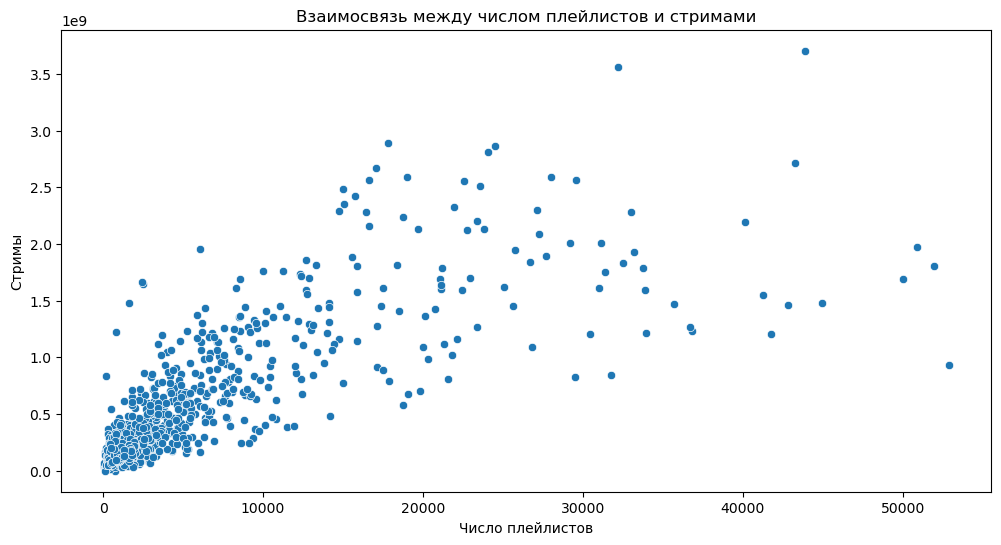

In [35]:
# 3. Влияние числа плейлистов на стримы
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='in_spotify_playlists', y='streams')
plt.title('Взаимосвязь между числом плейлистов и стримами')
plt.xlabel('Число плейлистов')
plt.ylabel('Стримы')
plt.show()

Изображен точечный график (scatter plot), который демонстрирует взаимосвязь между числом плейлистов, в которые был включен трек, и числом стримов этого трека на платформе. Ось X (горизонтальная) отображает количество плейлистов, а ось Y (вертикальная) — количество стримов в логарифмическом масштабе. Точки на графике представляют индивидуальные треки.

Треки, расположенные ближе к нижней части графика, имеют меньше стримов, в то время как точки, расположенные выше, указывают на треки с большим числом стримов. Аналогично, треки, которые находятся дальше вправо по оси X, включены в большее количество плейлистов.

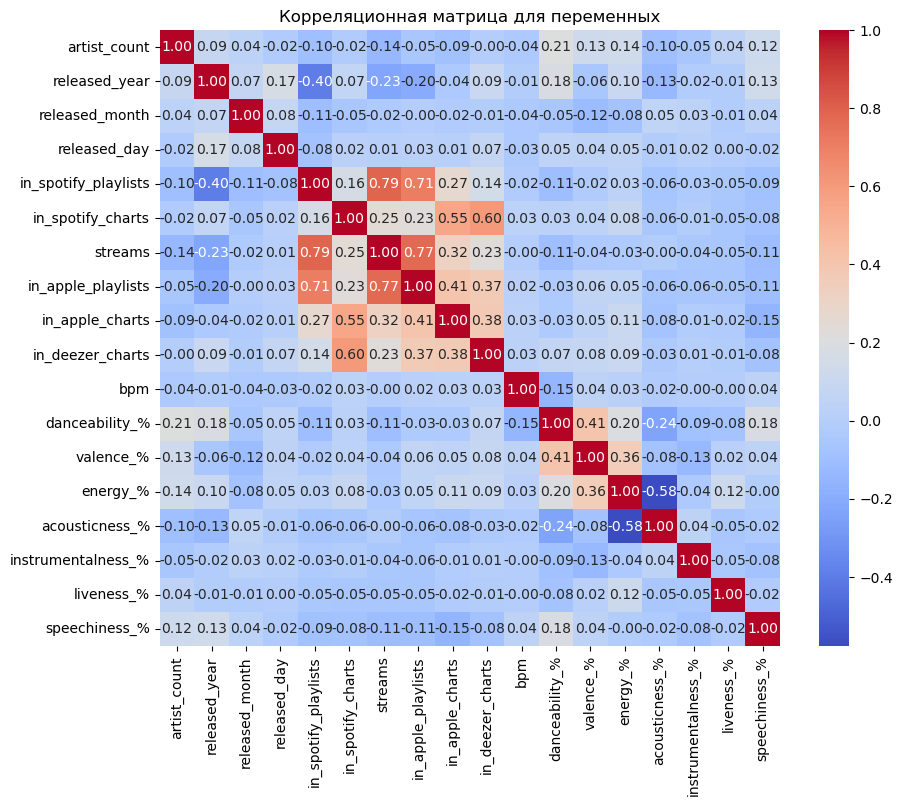

In [39]:
# Удаляем нечисловые столбцы
num_df = df.select_dtypes(include=[np.number])

# Вычисляем корреляционную матрицу только для числовых столбцов
corr_matrix = num_df.corr()

# Строим тепловую карту корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица для переменных")
plt.show()

На корреляционной матрице переменных видно, что переменная in_spotify_playlists имеет сильную положительную корреляцию со streams, что означает, что треки, присутствующие в большем числе плейлистов Spotify, склонны иметь большее количество стримов. Также заметна сильная корреляция между in_apple_playlists и in_apple_charts, что может указывать на то, что попадание в плейлисты Apple Music часто совпадает с попаданием в чарты этой же платформы.

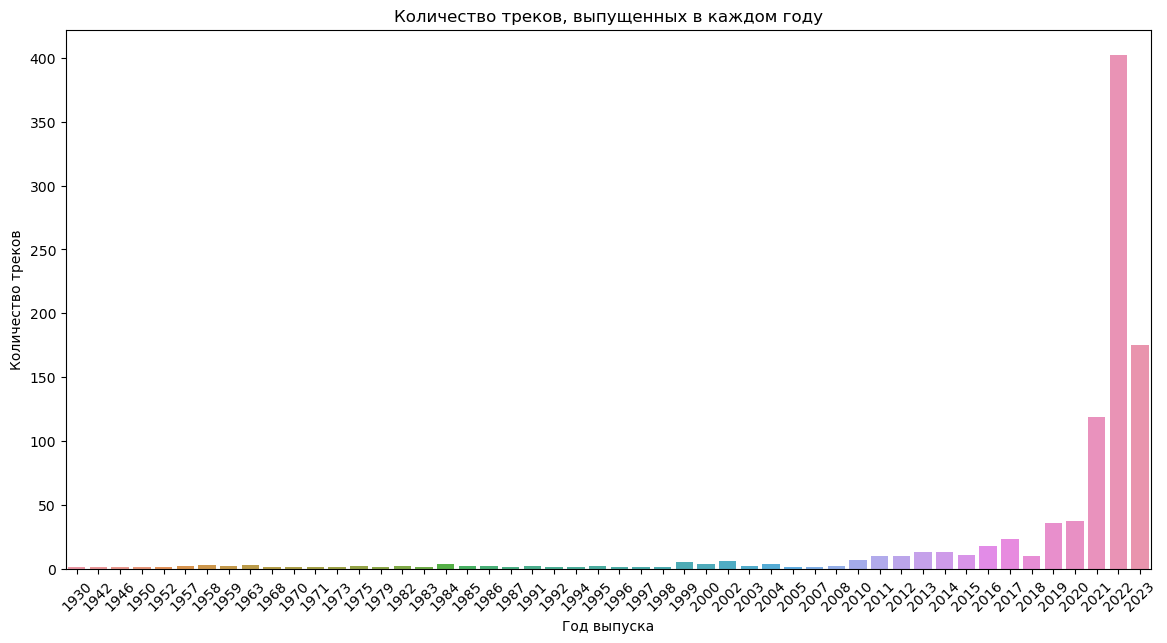

In [44]:
plt.figure(figsize=(14, 7))
sns.countplot(x='released_year', data=df)
plt.title("Количество треков, выпущенных в каждом году")
plt.xticks(rotation=45)
plt.xlabel("Год выпуска")
plt.ylabel("Количество треков")
plt.show()

Гипотезы:
1) Гипотеза о влиянии сезона на популярность треков:
Предположим, что треки, выпущенные в определенные месяцы или сезоны, имеют тенденцию набирать больше стримов. Например, летние хиты могут быть более популярны.
2) Гипотеза о связи между активностью в плейлистах и стримами:
Треки с большим количеством включений в плейлисты Spotify, Apple Music и Deezer могут иметь больше стримов.
3) Гипотеза о влиянии танцевальности и энергичности на популярность:
Треки с высокими показателями танцевальности и энергичности могут иметь более высокие стримы.

## 3 задание
### Создание новых признаков (максимум 10 баллов)

Иногда на основании имеющихся признаков можно создать новые. Например, из столбца с датой можно достать: является ли день рабочим, является ли месяц концом квартала, является ли день национальным праздник и т.д. Создавайте признаки, которые логически вписываются в Ваш набор данных. Балл ставится в зависимости от того, насколько сложными оказались признаки и насколько они логически вписываются в исследование.

#### Новые переменные:
Сезонный фактор:
Переменная season, которая классифицирует треки по сезону выпуска (зима, весна, лето, осень) на основе месяца релиза.

In [46]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'
    
df['season'] = df['released_month'].apply(get_season)


In [47]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,is_int_streams,season
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,True,summer
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,True,spring
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,True,summer
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,True,summer
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,True,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,Major,60,24,39,57,0,8,3,True,autumn
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,Major,42,7,24,83,1,12,6,True,autumn
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,Major,80,81,67,4,0,8,6,True,autumn
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,Major,82,67,77,8,0,12,5,True,autumn


#### Переменная total_playlists_inclusions, суммируя включения трека в плейлисты по всем платформам.

In [49]:
# Преобразуем все столбцы в числовой формат, неправильные значения заменим на NaN, затем на 0
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce').fillna(0)
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce').fillna(0)
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').fillna(0)

# Теперь можно безопасно выполнять операции сложения
df['total_playlists_inclusions'] = df['in_spotify_playlists'] + df['in_apple_playlists'] + df['in_deezer_playlists']
df['total_playlists_inclusions'] = df['in_spotify_playlists'] + df['in_apple_playlists'] + df['in_deezer_playlists']

In [50]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,is_int_streams,season,total_playlists_inclusions
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,80,89,83,31,0,8,4,True,summer,641.0
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,71,61,74,7,0,10,4,True,spring,1580.0
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,51,32,53,17,0,31,6,True,summer,1582.0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,55,58,72,11,0,11,15,True,summer,8099.0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,65,23,80,14,63,11,6,True,spring,3304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,60,24,39,57,0,8,3,True,autumn,1051.0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,42,7,24,83,1,12,6,True,autumn,1192.0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,80,81,67,4,0,8,6,True,autumn,582.0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,82,67,77,8,0,12,5,True,autumn,1366.0


#### Показатель popularity_score, учитывающий стримы, включения в плейлисты и чарты.

In [51]:
df['popularity_score'] = df['streams'] + (df['in_spotify_charts'] + df['in_apple_charts'] + df['in_deezer_charts']) * 1000

In [52]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,is_int_streams,season,total_playlists_inclusions,popularity_score
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,89,83,31,0,8,4,True,summer,641.0,141801703
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,61,74,7,0,10,4,True,spring,1580.0,133904286
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,32,53,17,0,31,6,True,summer,1582.0,140337974
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,58,72,11,0,11,15,True,summer,8099.0,801159817
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,23,80,14,63,11,6,True,spring,3304.0,303434322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,24,39,57,0,8,3,True,autumn,1051.0,91487363
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,7,24,83,1,12,6,True,autumn,1192.0,121871870
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,81,67,4,0,8,6,True,autumn,582.0,73513683
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,67,77,8,0,12,5,True,autumn,1366.0,133921612


#### 'rhythm', которая является комбинацией танцевальности и энергичности.

In [53]:
df['rhythm'] = df['danceability_%'] * df['energy_%'] / 100
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,is_int_streams,season,total_playlists_inclusions,popularity_score,rhythm
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,83,31,0,8,4,True,summer,641.0,141801703,66.40
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,74,7,0,10,4,True,spring,1580.0,133904286,52.54
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,53,17,0,31,6,True,summer,1582.0,140337974,27.03
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,72,11,0,11,15,True,summer,8099.0,801159817,39.60
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,80,14,63,11,6,True,spring,3304.0,303434322,52.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,39,57,0,8,3,True,autumn,1051.0,91487363,23.40
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,24,83,1,12,6,True,autumn,1192.0,121871870,10.08
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,67,4,0,8,6,True,autumn,582.0,73513683,53.60
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,77,8,0,12,5,True,autumn,1366.0,133921612,63.14


## 4 задание
###  Гипотезы (максимум 20 баллов)

При визуализации у вас возникли гипотезы о закономерностях, которые есть в ваших данных. Проверьте эти гипотезы с помощью математической статистики. Итоговый балл зависит от того, насколько интересные находки вы сделаете и насколько корректно вы подберёте для проверки критерий/процедуру. Это может быть что угодно от непараметрических тестов и z-статистики до бутстрапа и теста отношения правдоподобий.



In [55]:
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df[df['season'] == 'spring']['streams'],
                                df[df['season'] == 'summer']['streams'],
                                df[df['season'] == 'autumn']['streams'],
                                df[df['season'] == 'winter']['streams'])
print(fvalue, pvalue)

4.578495130236879 0.00343186927924295


Так как p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что все группы (весна, лето, осень, зима) имеют одинаковое среднее количество стримов. Это указывает на то, что сезон выпуска трека может влиять на его популярность.

In [56]:
correlation, pvalue = stats.pearsonr(df['total_playlists_inclusions'], df['streams'])
print(correlation, pvalue)

0.7962289005222142 1.5003430844025104e-209


1) Результат корреляционного анализа Пирсона с коэффициентом корреляции 0.796 и p-значением очень близким к 0 (1.5003430844025104e-209) показывает сильную положительную связь между количеством включений трека в плейлисты и числом стримов. Это означает, что чем больше трек включен в плейлисты на различных музыкальных платформах, тем больше стримов он, как правило, получает.

2) Так как p-значение настолько мало, мы можем быть уверены в статистической значимости этой взаимосвязи. Эти результаты могут служить основанием для утверждения, что стратегии включения треков в плейлисты являются эффективным способом увеличения их популярности среди слушателей.

3) Эти выводы могут быть полезны для маркетологов и продюсеров, стремящихся максимизировать видимость и стримы своих музыкальных треков

In [57]:
import statsmodels.api as sm

X = df[['danceability_%', 'energy_%']]
y = df['streams']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.350
Date:                Tue, 30 Apr 2024   Prob (F-statistic):            0.00489
Time:                        01:42:21   Log-Likelihood:                -20533.
No. Observations:                 952   AIC:                         4.107e+04
Df Residuals:                     949   BIC:                         4.109e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.968e+08   1.02e+08      7.

1) R-squared (коэффициент детерминации): Значение 0.011 очень низкое, что говорит о том, что модель не очень хорошо объясняет вариативность количества стримов. Только около 1.1% изменчивости стримов можно объяснить с помощью данной модели.
2) Adj. R-squared (скорректированный коэффициент детерминации): С учетом числа предикторов значение 0.009 также указывает на слабую объясняющую способность модели.
3) F-statistic (F-статистика) и Prob (F-statistic) (вероятность F-статистики): F-статистика тестирует гипотезу о том, что все коэффициенты регрессии равны нулю. p-значение 0.00489 говорит о том, что хотя бы один из предикторов значимо влияет на количество стримов.
4) coef (коэффициенты): Коэффициент для danceability_% равен примерно -4.045e+06, что означает, что с каждым процентным увеличением танцевальности стримы уменьшаются на примерно 4 миллиона. Коэффициент для energy_% не является статистически значимым, как указывает p-значение 0.871.
5) P>|t| (p-значения): danceability_% имеет p-значение 0.002, что означает, что танцевальность имеет статистически значимое влияние на количество стримов при уровне значимости 0.05. В то время как energy_% не является значимым предиктором.
6) [0.025 0.975] (95% доверительный интервал): Для danceability_% интервал не включает 0, что подтверждает значимость этого предиктора. Для energy_% интервал включает 0, что подтверждает его незначительное влияние.

7) Диагностика модели: Показатели Omnibus, Skew (асимметрия), Kurtosis (эксцесс) и Jarque-Bera говорят о том, что остатки не распределены нормально. Это может указывать на наличие проблем с моделью, таких как неправильно специфицированные переменные или наличие выбросов.


В целом, результаты указывают на то, что танцевальность влияет на популярность треков в отрицательном направлении. 

#### Гипотеза о влиянии количества артистов на треке на его популярность


In [58]:
# Количественный анализ с помощью корреляции Пирсона
correlation, pvalue = stats.pearsonr(df['artist_count'], df['streams'])
print(correlation, pvalue)


-0.13646347478241871 2.3919729860014523e-05


 между количеством артистов на треке и числом его стримов существует слабая отрицательная корреляция.

## 5 задание
### Машинное обучение (максимум 20 баллов)

Скорее всего, в ваших данных есть какая-то переменная, которую есть смысл попробовать предсказать. Подробно объясните, что именно вы собираетесь предсказывать и зачем. Какую заадчу вы решаете? Какую метрику вы будете использовать для того, чтобы измерить качество вашей модели?

Аккуратно разбейте выборку на обучающую и тестовую, сделайте всю необходимую предобработку данных и обучите несколько моделей. Подберите для них все необходимые гиперпараметры. Проанализируйте получившиеся результаты и сделайте выводы.



1) Для данной задачи машинного обучения разумно предположить, что мы хотим предсказать количество стримов (streams) для музыкальных треков. Это может быть полезно для музыкальных продюсеров и маркетологов для планирования рекламных кампаний, оценки потенциальной популярности треков, а также для оптимизации ресурсов, направленных на продвижение.

2) Задача состоит в создании регрессионной модели, которая будет предсказывать количество стримов на основе доступных характеристик трека, таких как danceability_%, energy_%, key, mode, и других.


In [60]:
from sklearn.model_selection import train_test_split

# Предполагая, что df уже содержит все необходимые числовые колонки и не содержит NaN
X = df.drop('streams', axis=1)
y = df['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
print(X.dtypes)

# Удаление столбцов с типом данных 'object', если они не должны использоваться в модели
object_columns = X.select_dtypes(include=['object']).columns
X = X.drop(columns=object_columns)

# Повторное разделение данных на обучающую и тестовую выборки после всех изменений
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Повторное обучение и оценка модели линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Линейная регрессия MSE:", mse_lr)
print("Линейная регрессия R2 Score:", r2_lr)

artist(s)_name                 object
artist_count                    int64
released_year                   int64
released_month                  int64
released_day                    int64
in_spotify_playlists            int64
in_spotify_charts               int64
in_apple_playlists              int64
in_apple_charts                 int64
in_deezer_playlists           float64
in_deezer_charts                int64
in_shazam_charts               object
bpm                             int64
danceability_%                  int64
valence_%                       int64
energy_%                        int64
acousticness_%                  int64
instrumentalness_%              int64
liveness_%                      int64
speechiness_%                   int64
is_int_streams                   bool
season                         object
total_playlists_inclusions    float64
popularity_score                int64
rhythm                        float64
key_A                            bool
key_A#      

In [68]:
# Проверка корреляции между переменными и 'streams'
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()
print(correlation_matrix['streams'].sort_values(ascending=False))

streams                       1.000000
popularity_score              1.000000
total_playlists_inclusions    0.796229
in_spotify_playlists          0.789822
in_apple_playlists            0.772063
in_deezer_playlists           0.397284
in_apple_charts               0.320234
in_spotify_charts             0.245821
in_deezer_charts              0.228598
released_day                  0.010598
bpm                          -0.002438
acousticness_%               -0.004485
released_month               -0.024938
energy_%                     -0.026051
valence_%                    -0.040831
instrumentalness_%           -0.044902
liveness_%                   -0.048337
rhythm                       -0.084464
danceability_%               -0.105457
speechiness_%                -0.112333
artist_count                 -0.136463
released_year                -0.230803
Name: streams, dtype: float64
